In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns


In [13]:
df = pd.read_csv('letters.csv')#,index_col=0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   label     42000 non-null  int64
 1   pixel43   42000 non-null  int64
 2   pixel44   42000 non-null  int64
 3   pixel92   42000 non-null  int64
 4   pixel124  42000 non-null  int64
 5   pixel125  42000 non-null  int64
 6   pixel126  42000 non-null  int64
 7   pixel127  42000 non-null  int64
 8   pixel128  42000 non-null  int64
 9   pixel129  42000 non-null  int64
 10  pixel130  42000 non-null  int64
 11  pixel131  42000 non-null  int64
 12  pixel132  42000 non-null  int64
 13  pixel133  42000 non-null  int64
 14  pixel134  42000 non-null  int64
 15  pixel135  42000 non-null  int64
 16  pixel136  42000 non-null  int64
 17  pixel137  42000 non-null  int64
 18  pixel138  42000 non-null  int64
 19  pixel146  42000 non-null  int64
 20  pixel147  42000 non-null  int64
 21  pixel148  42000 non-null  int64
 22

In [15]:
df.head(10)

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0
5,0,0,0,0,3,141,202,254,193,44,...,0,0,255,123,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,51,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,15,218,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,235,253,229,23,0,0,0,0,0
9,3,0,0,0,254,255,199,111,18,9,...,0,253,122,253,253,170,0,0,0,0


In [16]:
# Separating the dependent and independent variable
y = df['label']
X = df.drop('label', axis = 1)

  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1245)
# Splitting the data into training and testing data

# Training KNN Model

In [21]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 9):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [22]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.7907142857142857, 0.6055952380952381]
3 : [0.7758035714285715, 0.6333333333333333]
4 : [0.7508928571428571, 0.6460714285714285]
5 : [0.7412202380952381, 0.6516666666666666]
6 : [0.7311904761904762, 0.6545238095238095]
7 : [0.7238095238095238, 0.6528571428571428]
8 : [0.7188095238095238, 0.6555952380952381]


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


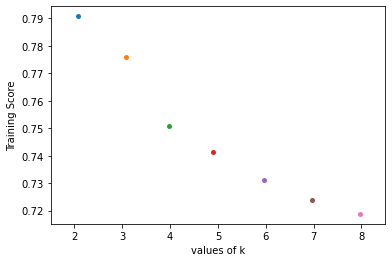

In [23]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()
# function to show plot

## Using k=2 only for the best model

In [38]:
import time
from sklearn.metrics import mean_absolute_error
start_time = time.time()

clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

In [39]:
print("Execution Time: %s seconds ---" % (time.time() - start_time))

# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

Execution Time: 4.029138565063477 seconds ---
Accuracy: 0.6055952380952381
MAE: 1.3079761904761904


# Training a Random Forest model 

In [53]:
dataframe_random_forest = df
X=dataframe_random_forest.values
y = y_logr

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [54]:
import time
start_time = time.time()

# Create Decision Tree classifer object
clf = RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [55]:
print("Execution Time: %s seconds ---" % (time.time() - start_time))

# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

Execution Time: 4.540936708450317 seconds ---
Accuracy: 0.9854761904761905
MAE: 0.023452380952380954


## with feature selection

In [72]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

y_logr=df['label']
x_logr=df.drop(['label'],axis=1) 

rfe = RFE(clf,35)
rfe = rfe.fit(x_logr, y_logr.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=35 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


[False False False  True  True  True  True  True  True  True  True  True
  True False False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False]
[10  9  5  1  1  1  1  1  1  1  1  1  1  2  4  7  8 11  3  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6]


In [73]:
to_select_column = rfe.support_
all_columns = list(df.columns)
all_columns.remove('label')
selected_features = []
for i in range(0,len(all_columns)):
    if(to_select_column[i] == True):
        selected_features.append(all_columns[i])

In [74]:
random_forest_selected_features = selected_features
random_forest_selected_features

['pixel124',
 'pixel125',
 'pixel126',
 'pixel127',
 'pixel128',
 'pixel129',
 'pixel130',
 'pixel131',
 'pixel132',
 'pixel133',
 'pixel147',
 'pixel148',
 'pixel149',
 'pixel150',
 'pixel151',
 'pixel152',
 'pixel153',
 'pixel154',
 'pixel155',
 'pixel156',
 'pixel157',
 'pixel158',
 'pixel159',
 'pixel160',
 'pixel327',
 'pixel328',
 'pixel329',
 'pixel351',
 'pixel410',
 'pixel411',
 'pixel412',
 'pixel413',
 'pixel414',
 'pixel415',
 'pixel416']

## Considering only selected features

In [75]:
dataframe_random_forest = df[selected_features]
X=dataframe_random_forest.values
y = y_logr

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [76]:
import time
start_time = time.time()

# Create Decision Tree classifer object
clf = RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [77]:
print("Execution Time: %s seconds ---" % (time.time() - start_time))

# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

Execution Time: 6.159554719924927 seconds ---
Accuracy: 0.7007142857142857
MAE: 0.9747619047619047


## feature selection clearly did not help, lets try more number of trees

## Considering more number of trees in Random Forest

In [80]:
dataframe_random_forest = df
X=dataframe_random_forest.values
y = y_logr

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [81]:
import time
start_time = time.time()

# Create Decision Tree classifer object
clf = RandomForestClassifier(n_estimators=500)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [82]:
print("Execution Time: %s seconds ---" % (time.time() - start_time))

# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

Execution Time: 22.5039279460907 seconds ---
Accuracy: 0.9841666666666666
MAE: 0.022738095238095238


## More trees decreased the accuracy a little but equally decreased the error

# Training Neural Network Model

In [83]:
X=df.values
y = y_logr

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [84]:
from sklearn.neural_network import MLPClassifier
import time
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

In [85]:
print("Execution Time: %s seconds ---" % (time.time() - start_time))

# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

Execution Time: 29.258266925811768 seconds ---
Accuracy: 0.998452380952381
MAE: 0.0019047619047619048


## Using optimal number of neurons in each layer 

In [100]:
from sklearn.neural_network import MLPClassifier
import time
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8),max_iter=500)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

In [101]:
print("Execution Time: %s seconds ---" % (time.time() - start_time))

# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

Execution Time: 29.660076141357422 seconds ---
Accuracy: 0.9983333333333333
MAE: 0.0017857142857142857


## Using More layers

In [102]:
from sklearn.neural_network import MLPClassifier
import time
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8,8),max_iter=500)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

In [103]:
print("Execution Time: %s seconds ---" % (time.time() - start_time))

# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

Execution Time: 32.57200574874878 seconds ---
Accuracy: 0.9997619047619047
MAE: 0.0002380952380952381


In [ ]:
Ref : 
1. https://www.springboard.com/blog/ai-machine-learning/beginners-guide-neural-network-in-python-scikit-learn-0-18/
2. https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e        